In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#local
from include_package import Welcome_party
Welcome_party().initialize()
from dlc_iteration import dlc_db
from fig_1_visualization_config import visual_config

vis_config=visual_config()


['/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git/refs', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git/refs/remotes', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git/logs', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git/logs/refs', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git/logs/refs/remotes', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/.git/objects', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/utils', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/Figure_2', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/Figure_1', '/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/videos']
/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper
/home/morteza/dlc_projects/Analysis/Currencodes/csm_paper/utils
/home/morteza/dlc_pr

In [2]:
db=dlc_db()
targs=['LID', 'SKF', 'SUM']
db.select_treatment(targets=targs)
means_df=[]



for the_ky in db.keys:
    
    i=0
    while i<len(db.t_ps):
        t_point=db.t_ps[i]
        
        
        try:
            db.get_animal(the_ky, db.t_ps[i])
            means_df.append((np.mean(db.main_ar()), np.mean(db.mid_head_angs_atan()), np.mean(db.rot_speed()), 
                         np.mean(db.translation()),int(t_point), the_ky, db.treatment))
        except:
            print(the_ky+'missing'+t_point)
        i+=1
        


observ_df=pd.DataFrame(means_df, columns=['mean_R', 'mean_phi', 'mean_rot_speed', 'mean_trans.', 
                                          'time', 'animal', 'treatment'])
observ_df.replace({'treatment' : { 'SKF' : 'D1Ag',  'SUM' :'D2Ag',
                            'LID':'LD-3mg', 'D1A':'D1Ant', 'D2A':'D2Ant' }}, inplace=True)
observ_df.head()

17_SKFmissing80


,mean_R,mean_phi,mean_rot_speed,mean_trans.,time,animal,treatment
0,83.421323,91.958419,-0.028949,0.439567,10,65_SUM,D2Ag
1,44.524462,90.165235,-0.724950,1.554081,20,65_SUM,D2Ag
2,35.086149,92.025486,-0.355834,1.873227,30,65_SUM,D2Ag
3,37.884475,93.546193,-0.301687,2.028779,40,65_SUM,D2Ag
4,38.643268,94.870710,-0.623244,2.349014,50,65_SUM,D2Ag


<AxesSubplot:xlabel='time', ylabel='mean_phi'>

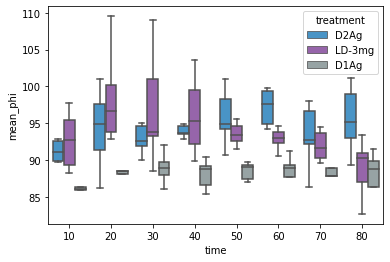

In [3]:
sns.boxplot(x='time', y='mean_phi', hue='treatment', data=observ_df, showfliers=False)

<AxesSubplot:xlabel='time', ylabel='mean_R'>

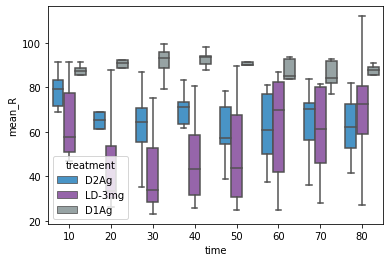

In [4]:
sns.boxplot(x='time', y='mean_R', hue='treatment', data=observ_df, showfliers=False)

<AxesSubplot:xlabel='time', ylabel='mean_rot_speed'>

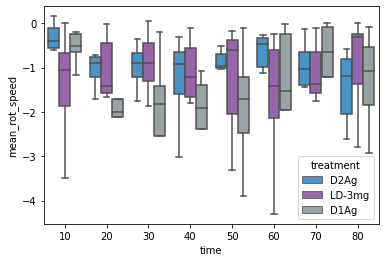

In [5]:
sns.boxplot(x='time', y='mean_rot_speed', hue='treatment', data=observ_df, showfliers=False)

<AxesSubplot:xlabel='time', ylabel='mean_trans.'>

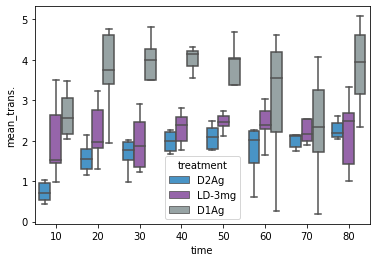

In [6]:
sns.boxplot(x='time', y='mean_trans.', hue='treatment', data=observ_df, showfliers=False)